
# Movies Recommender System with Python

In this project, we develop basic recommendation systems using Python and pandas. We focus on providing this recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Note that this is not a true robust recommendation system,it just tells us what movies/items are most similar to our movie choice.

The data we are using in this project is a subset of a larget dataset which can be found here : https://grouplens.org/datasets/movielens/



## Importing Libraries

In [6]:
import numpy as np
import pandas as pd

## Getting the USER data

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


**user_id - customer's ID <br>
item_id - Movie ID <br>
rating - Ratings given by the user <br>
timestamp - Time of the rating**

## Grabbing Movies Titles

In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Merging datasets to get movie's names with their IDs

In [7]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory Data Analysis


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Movies with best ratings (Might not be a good measure since only a few good ratings of an odd movie could propel it to become highest rated if the number of ratings are minimum)**

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

**Movies with the most ratings (Better measure)**

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

## Creating Ratings DataFrame

In [17]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(5)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


**Perfect! We have our Ratings DataFrame ready now to do EDA**

<AxesSubplot:>

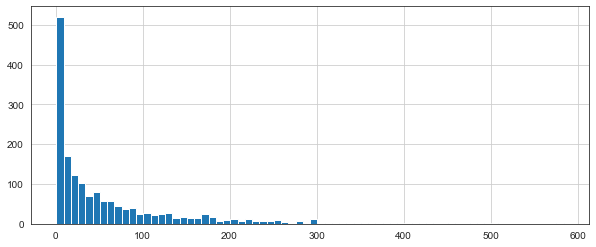

In [20]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

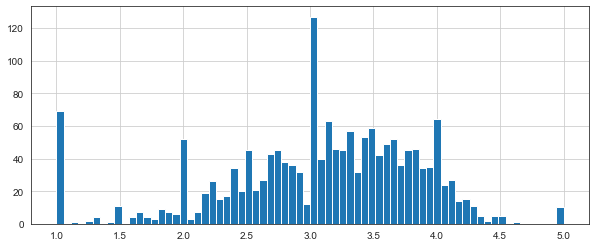

In [21]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

**We see that most movies are normally distributed around 3.0 or 3.5.** <br>
**We also see some outliers.**

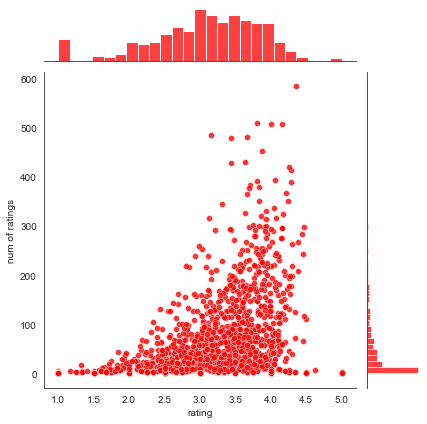

In [24]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.8,color='red')

**As we get more number of ratings, we atucally begin to see high rating of the movie which makes sense.**

## Recommending Similar Movies

In [31]:
moviemat = df.pivot_table(index='user_id',columns='title',
                          values = 'rating')

In [32]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Each cell in the above matrix represents the ratings given by the User to the movie**

In [34]:
ratings.sort_values('num of ratings',ascending=False).head(8)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452


### Let's choose two of the above movies to find recommendations. We will go with :
**1. Star Wars (1977) <br>**
**2. Liar Liar (1997)**

## Finding Correlations for Star Wars (1977) & Liar Liar (1997)

In [35]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [36]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

**We use corrwith() method here to find correlations between two panda series**

In [38]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

**We get the correlations of different movies with the Star Wars movie**

In [40]:
similar_to_starwars.head(10)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

**We get the correlations of different movies with the Liar Liar movie**

In [41]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [42]:
similar_to_liarliar.head(10)

title
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey (1968)                  -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.400918
dtype: float64

**Removing Null Values and creating a DataFrame of these correlations**

In [43]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


### Let's get the most correlated movies to Star Wars

In [44]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


**The above result does not make sense as it's recommending movies that have no real life correlation to Star Wars. The reason it doesn't make any sense because these movies are most likely are seen by one person who also happens to rate Star Wars 5 stars.**

**We can fix this by filtering out movies by the number of ratings so that we can set a threshold for the number of ratings necessary to be included in our model.**

In [45]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


# Perfectly Recommended Movies

## Star Wars (1977)

In [48]:
corr_starwars[corr_starwars['num of ratings']>250].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Indiana Jones and the Last Crusade (1989),0.350107,331


## Liar Liar (1997)

In [49]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>250].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Indiana Jones and the Last Crusade (1989),0.414427,331
Back to the Future (1985),0.378028,350
Jurassic Park (1993),0.370770,261
"Saint, The (1997)",0.362803,316


## Thanks for Reading!